## A quick look at KIC 10963065 (Rudy)

What I'm about to do is all available and annotated at: https://tinyurl.com/lk-seis

In [1]:
import warnings
warnings.filterwarnings('ignore')

import lightkurve as lk

target = 'KIC10963065'

In [2]:
datalist = lk.search_lightcurvefile(target=target, cadence='short')

In [3]:
datalist

SearchResult containing 27 data products.

 target_name            productFilename                        description              distance
------------- ------------------------------------ ------------------------------------ --------
kplr010963065 kplr010963065-2009259162342_slc.fits  Lightcurve Short Cadence (CSC) - Q2      0.0
kplr010963065 kplr010963065-2010111051353_slc.fits  Lightcurve Short Cadence (CSC) - Q5      0.0
kplr010963065 kplr010963065-2010140023957_slc.fits  Lightcurve Short Cadence (CSC) - Q5      0.0
kplr010963065 kplr010963065-2010174090439_slc.fits  Lightcurve Short Cadence (CSC) - Q5      0.0
kplr010963065 kplr010963065-2010203174610_slc.fits  Lightcurve Short Cadence (CSC) - Q6      0.0
kplr010963065 kplr010963065-2010234115140_slc.fits  Lightcurve Short Cadence (CSC) - Q6      0.0
kplr010963065 kplr010963065-2010265121752_slc.fits  Lightcurve Short Cadence (CSC) - Q6      0.0
kplr010963065 kplr010963065-2010296114515_slc.fits  Lightcurve Short Cadence (CSC) -

In [4]:
data = datalist[1:10].download_all()

In [5]:
data

LightCurveFileCollection of 9 objects:
	KIC 10963065 (9 KeplerLightCurveFiles) Quarters: 5,5,5,6,6,6,7,7,7

In [6]:
lc = data.stitch()

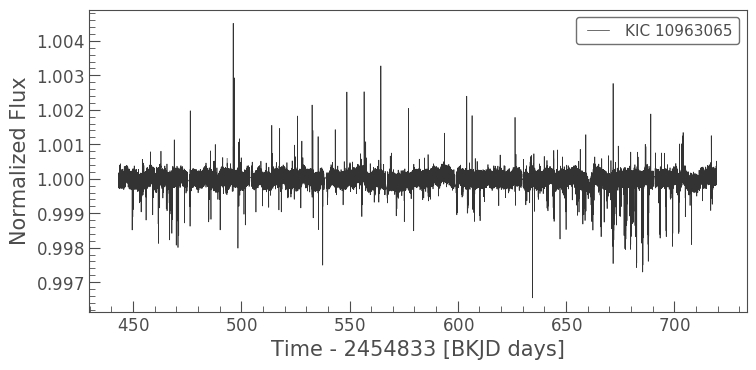

In [7]:
lc.plot()

In [8]:
lc = lc.normalize().remove_outliers().remove_nans()

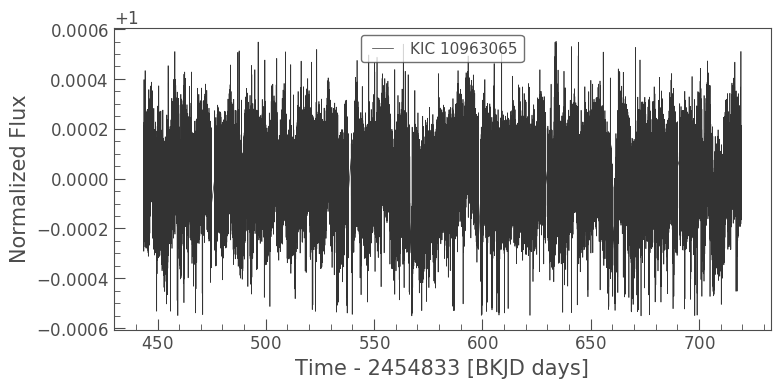

In [9]:
lc.plot()

## Using lightkurve.periodogram

In [15]:
pg = lc.to_periodogram(normalization='psd', minimum_frequency=500, maximum_frequency=4000)

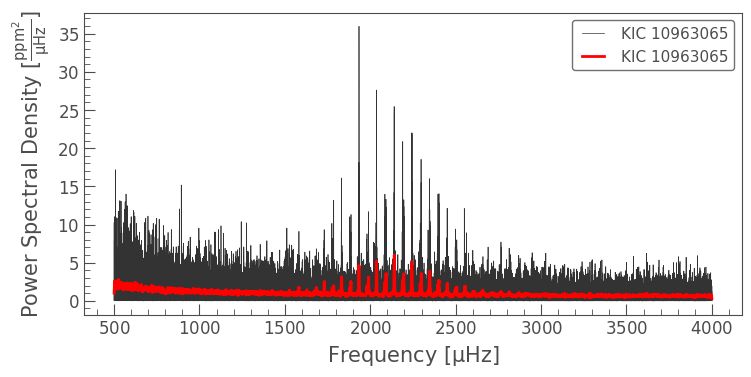

In [17]:
ax = pg.plot()
pg.smooth(filter_width=3).plot(ax=ax, lw=2, c='r')

In [18]:
snr = pg.flatten()

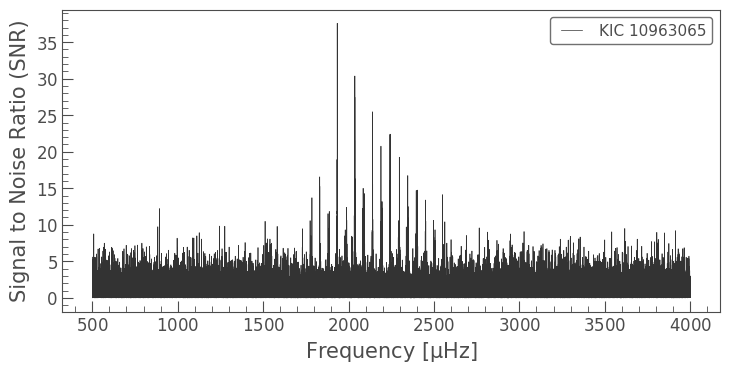

In [19]:
snr.plot()

## Using lightkurve.seismology

In [20]:
seis = snr.to_seismology()

In [21]:
seis

Seismology(ID: 10963065) - no values have been computed so far.

In [22]:
numax = seis.estimate_numax()

In [23]:
numax

numax: 2165.00 uHz (method: ACF2D)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x121a751d0>,
      dtype=object)

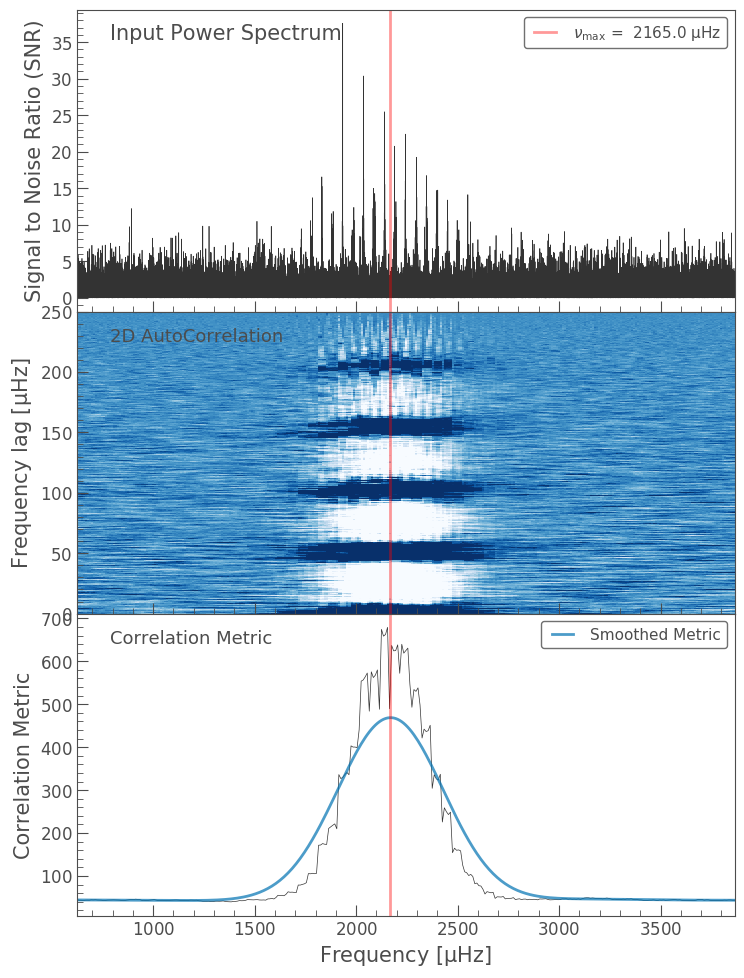

In [24]:
seis.diagnose_numax()

In [25]:
deltanu = seis.estimate_deltanu()

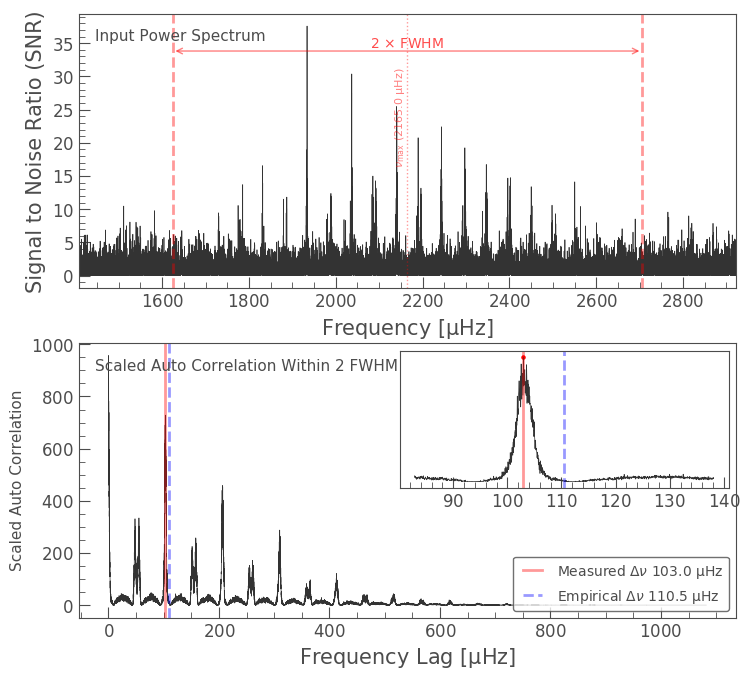

In [26]:
seis.diagnose_deltanu()

In [27]:
seis

Seismology(ID: 10963065) - computed values:
 * numax: 2165.00 uHz (method: ACF2D)
 * deltanu: 102.97 uHz (method: ACF2D)

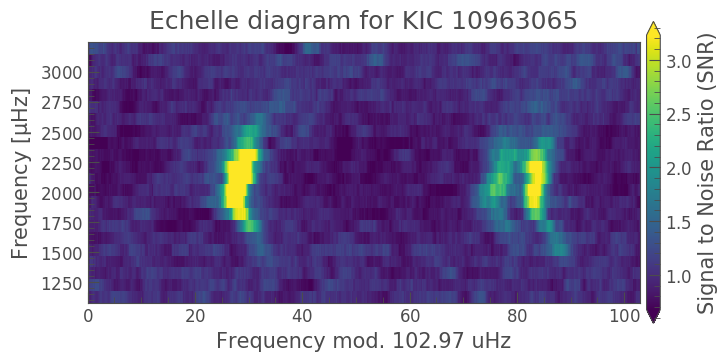

In [29]:
seis.plot_echelle(smooth_filter_width=3, cmap='viridis')

## Estimating stellar parameters

In [30]:
#Mathur 2010, Asteroseismic Modelling Portal
Teff = 6046
trueradius = 1.20
truemass = 1.03
truelogg = 4.29

In [31]:
mass = seis.estimate_mass(Teff)

In [36]:
mass

mass: 1.09 solMass (method: Uncorrected Scaling Relations)

In [37]:
radius = seis.estimate_radius(Teff)

In [38]:
radius

radius: 1.23 solRad (method: Uncorrected Scaling Relations)

In [39]:
logg = seis.estimate_logg(Teff)

In [40]:
logg

logg: 4.29 dex (method: Uncorrected Scaling Relations)

In [41]:
print('Radius : {} (AMP) vs {:.2f} (lk) Rsol'.format(trueradius, radius.value))
print('Mass : {} (AMP) vs {:.2f} (lk) Msol'.format(truemass, mass.value))
print('logg : {} (AMP) vs {:.2f} (lk) dex'.format(truelogg, logg.value))

Radius : 1.2 (AMP) vs 1.23 (lk) Rsol
Mass : 1.03 (AMP) vs 1.09 (lk) Msol
logg : 4.29 (AMP) vs 4.29 (lk) dex


In [42]:
seis

Seismology(ID: 10963065) - computed values:
 * numax: 2165.00 uHz (method: ACF2D)
 * deltanu: 102.97 uHz (method: ACF2D)
 * mass: 1.09 solMass (method: Uncorrected Scaling Relations)
 * radius: 1.23 solRad (method: Uncorrected Scaling Relations)
 * logg: 4.29 dex (method: Uncorrected Scaling Relations)